In [1]:
%matplotlib inline
import numpy as np
import csv
import matplotlib.pyplot as plt

In [28]:
import csv

#importing the csv file
with open('deficits2.csv') as f:
    defmatrix=[list(line) for line in csv.reader(f)]
#defmatrix is a matrix (list of lists) of all rows of dataset

In [36]:
defmatrix2 = []
defmatrix2.append(defmatrix[0])
for row in defmatrix[1:]:
    rowtemp=[]
    rowtemp.append(row[0])
    for x in row[3:]:
        x = float(x)
        rowtemp.append(x)
    defmatrix2.append(rowtemp)

In [31]:
#print(defmatrix2)

In [37]:
services = []
for row in defmatrix2[1:]:
    services.append(row[0])
uniques = set(services)
uniques2 = list(uniques)
print(uniques2)

['506', '409', '604', '600', '122', '601', '900', '253 & 254', '250', '111', '107', '509', '201', '252', '118 & 124', '202', '420', '100', '108', '121', '603', '102 & 105', '702', '113', '424', '703', '507', '701', '800', '106', '901 & 902', '602', '112', '411', '251', '700', '200', '605', '109', '505']


In [48]:
uniqdef = {}
uniqcounter=[]
for item in uniques:
    sums=[0.0]*12
    counter=0
    for row in defmatrix2[1:]:
        if row[0] == item:
            counter+=1
            deficits=[]
            temp = 0
            for value in range(12):
                if temp < 24:
                    curr = getdeficit(row[1:], temp, temp+1)
                    deficits.append(curr)
                    temp+=2
            for value in range(12):
                sums[value]+=deficits[value]
    uniqdef[item] = sums
    uniqcounter.append((item,counter))
print(uniqdef["100"])

There was an error with row: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5324.0, 5902.0, 4371.0, 5305.0, 6474.0, 5141.0, 3670.0, 4466.0, 1966.0, -999.0, 1313.0, 0.0, 1391.0, 0.0, 1436.0, 0.0, 1469.0, 0.0]
ERROR: (1966.0,-999.0)
[44064.0, 130596.0, -20851.0, 209098.0, -91380.0, -27943.0, -12770.0, -16019.0, 0.0, 0.0, 0.0, 0.0]


In [47]:
def getdeficit(row, fund_index, req_index):
    """Returns the deficit of a pair of funding/requirements.
    row: a list of fund/reqs (2010-2021, len(row) = 26)
    fund_index: the index of the desired year's funding in the list
    req_index: the index of the desired year's requirements in the list"""
    
    fund = row[fund_index]
    #print("This is the funding: " + str(fund))
    req = row[req_index]
    #print("This is the requirement: " + str(req))
    
    #UNDER-FUNDING
    if fund < 0.0:
        #print("UNDER")
        deficit = fund
        
    elif ((fund > req) and (req == 0.0) and (fund > 0.0)):
        #print("MET")
        deficit = 0.0
        
    elif ((fund < req) and (fund == 0.0) and (req > 0.0)):
        #print("UNDER")
        deficit = fund-req
        
    elif ((fund > req) and (fund > 0.0) and (req > 0.0)):
        #print("OVER")
        deficit = fund-req
        
    elif ((fund < req) and (fund > 0.0) and (req > 0.0)):
        #print("UNDER")
        deficit = fund-req
        
    elif (fund == req):
        #print("MET")
        deficit = 0.0
    else:
        print("There was an error with row: " + str(row))
        print("ERROR: (" + str(row[fund_index]) + ',' + str(row[req_index]) + ")" )
        deficit=fund-np.absolute(req)
    return deficit

In [ ]:
test = [-80, 10, -80, 0, 80, 0, 0, 80, 100, 80, 80, 100, 80, 80, 0, 0]

# TESTING

In [49]:
def get_deficit_ratios(iss, row):
    """Returns the ratio for a row of funding/requirements.
    row: a list of fund/reqs (2010-2021, len(row) = 24, pairs = 12)"""
    rowreqs = []
    for item in range(len(row)):
        if (item % 2 != 0):
            rowreqs.append(row[item])
    #print("REQS: " + str(rowreqs))
    
    rowfunds = []
    for item in range(len(row)):
        if (item %2 == 0):
            rowfunds.append(row[item])
    #print("FUNDS: " + str(rowfunds))
    
    rowdefs = []
    ratios = []
    for i in range(12):
        fund = rowfunds[i]
        req = rowreqs[i]

        if fund < 0.0:
            #print("UNDER")
            deficit = fund
            ratio = -((np.absolute(fund)/(np.absolute(fund)+req)))

        elif ((fund > req) and (req == 0.0) and (fund > 0.0)):
            #print("MET")
            deficit = 0.0
            ratio = 0.0

        elif ((fund < req) and (fund == 0.0) and (req > 0.0)):
            #print("UNDER")
            deficit = fund-req
            ratio = deficit/req

        elif ((fund > req) and (fund > 0.0) and (req > 0.0)):
            #print("OVER")
            deficit = fund-req
            ratio = (deficit)/req
            #FLAG for over-funded outliers
            if ratio >= 100.0:
                print("ISS "+str(iss)+' with ratio '+str(ratio)+" in "+str((fund,req))+ ", flagged for possible outlier")
                print("Replaced with ratio = 100.0 (over-funded) to prevent inflated ratio from biasing insights")
                ratio =100.0
                print("")

        elif ((fund < req) and (fund > 0.0) and (req > 0.0)):
            #print("UNDER")
            deficit = fund-req
            ratio = deficit/req

        elif (fund == req):
            #print("MET")
            deficit = 0.0
            ratio = 0.0

        rowdefs.append(deficit)
        ratios.append(ratio)
    #print("DEFS: " + str(rowdefs))
    return ratios

In [52]:
def get_deficit_ratios2(iss, row):
    """Returns the ratio for a row of funding/requirements.
    row: a list of fund/reqs (2010-2021, len(row) = 24, pairs = 12)"""
    rowreqs = []
    for item in range(len(row)):
        if (item % 2 != 0):
            rowreqs.append(row[item])
    
    rowfunds = []
    for item in range(len(row)):
        if (item %2 == 0):
            rowfunds.append(row[item])
    
    rowdefs = []
    for i in range(12):
        fund = rowfunds[i]
        req = rowreqs[i]

        if fund < 0.0:
            #print("UNDER")
            deficit = fund

        elif ((fund > req) and (req == 0.0) and (fund > 0.0)):
            #print("MET")
            deficit = 0.0

        elif ((fund < req) and (fund == 0.0) and (req > 0.0)):
            #print("UNDER")
            deficit = fund-req

        elif ((fund > req) and (fund > 0.0) and (req > 0.0)):
            #print("OVER")
            deficit = fund-req

        elif ((fund < req) and (fund > 0.0) and (req > 0.0)):
            #print("UNDER")
            deficit = fund-req

        elif (fund == req):
            #print("MET")
            deficit = 0.0

        rowdefs.append(deficit)
        
    difftuples=[]
    for value in range(len(rowdefs)):
        _def = rowdefs[value]
        _req = rowreqs[value]
        difftuples.append([_def,_req])
    
    return difftuples

In [55]:
#CHECKPOINT
print(defmatrix2[1:][1:17][2][1:])
for x in np.arange(16):
    print(get_deficit_ratios2(x, defmatrix2[1:][1:17][x][1:]))

[0.0, 1671.0, 1558.0, 1359.0, 170.0, 170.0, 0.0, 175.0, 2820.0, 401.0, 0.0, 840.0, 442.0, 767.0, 528.0, 643.0, 551.0, 0.0, 578.0, 0.0, 597.0, 0.0, 599.0, 0.0]
[[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0]]
[[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0]]
[[-1671.0, 1671.0], [199.0, 1359.0], [0.0, 170.0], [-175.0, 175.0], [2419.0, 401.0], [-840.0, 840.0], [-325.0, 767.0], [-115.0, 643.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0]]
[[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0]]
[[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0]]
[[-17873.0, 18105.0], [-20900.0, 21099.0], [-296.0, 478.0], [0.0, 217.0], [30

In [56]:
#FOR CALCULATION OF AVERAGE RATIOS PER APE
ratiorows = {}
for item in uniques:
    ratiocount = 0
    sums=[0.0]*12
    newsums = [0.0]*12
    for row in defmatrix2[1:]:
        if row[0] == item:
            ratios = get_deficit_ratios(item, row[1:])
            for value in range(12):
                sums[value]+=ratios[value]
            ratiocount+=1
    for value in range(len(sums)):
        temp = sums[value]/ratiocount
        newsums[value] = temp
    ratiorows[item] = newsums

#for item in uniques:
    #print(str(item) + ': ' + str(ratiorows[item]))
    #print("")

ISS 600 with ratio 1672.6041666666667 in (80333.0, 48.0), flagged for possible outlier
Replaced with ratio = 100.0 (over-funded) to prevent inflated ratio from biasing insights

ISS 600 with ratio 361.463768115942 in (50020.0, 138.0), flagged for possible outlier
Replaced with ratio = 100.0 (over-funded) to prevent inflated ratio from biasing insights

ISS 600 with ratio 142.57142857142858 in (5025.0, 35.0), flagged for possible outlier
Replaced with ratio = 100.0 (over-funded) to prevent inflated ratio from biasing insights

ISS 600 with ratio 214.48387096774192 in (6680.0, 31.0), flagged for possible outlier
Replaced with ratio = 100.0 (over-funded) to prevent inflated ratio from biasing insights

ISS 108 with ratio 4476.858974358975 in (349273.0, 78.0), flagged for possible outlier
Replaced with ratio = 100.0 (over-funded) to prevent inflated ratio from biasing insights

ISS 700 with ratio 136.84639498432603 in (43973.0, 319.0), flagged for possible outlier
Replaced with ratio = 100

In [61]:
#FOR CALCULATION OF RATIOS PER SERVICE
ratiorows2 = {}
for item in uniques:
    defs2=[0.0]*12
    reqs2=[0.0]*12
    newratios = []
    for row in defmatrix2[1:]:
        if row[0] == item:
            difftuples = get_deficit_ratios2(item, row[1:])
            defs=[]
            reqs=[]
            for pair in difftuples:
                defs.append(pair[0])
                reqs.append(pair[1])
            for value in range(12):
                defs2[value]+=defs[value]
                reqs2[value]+=reqs[value]
    for i in range(len(defs2)):
        tempdef = defs2[i]
        tempreq = reqs2[i]
        if tempreq == 0.0:
            newratio = 0.0
        else:
            newratio = tempdef/tempreq
        newratios.append(newratio)
    ratiorows2[item] = newratios

#for item in uniques:
    #print(str(item) + ': ' + str(ratiorows[item]))
    #print("")
print(ratiorows2["100"])
print(uniqdef["100"])

[0.2062370996503742, 0.7687001153674099, -0.15191764054440007, 1.1610556767892144, -0.6362357790372217, -0.19223175404682136, -0.10498191384413022, -0.15479973187314466, 0.0, 0.0, 0.0, 0.0]
[44064.0, 130596.0, -20851.0, 209098.0, -91380.0, -27943.0, -12770.0, -16019.0, 0.0, 0.0, 0.0, 0.0]


In [12]:
rowvalues = ['F10', 'R10', 'F11', 'R11', 'F12', 'R12', 'F13', 'R13', 'F14', 'R14',
           'F15', 'R15', 'F16', 'R16', 'F17', 'R17', 'F18', 'R18', 'F19', 'R19', 'F20', 'R20', 'F21', 'R21']
rowyears = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']

In [14]:
keys=[]
for uni in uniques:
    for k in ratiorows.keys():
        if k == uni:
            keys.append(k)

ratiotuples = []
ratiotuples.append(keys)
for uni in uniques:
    for k in ratiorows.keys():
        if k == uni:
            loc = list(ratiorows.keys()).index(k)
            v = (list(ratiorows.values()))[loc]
            ratiotuples.append(v)

In [62]:
with open('finaldeficitdata.csv', 'w') as f:  # Just use 'w' mode in 3.x
    w = csv.writer(f, delimiter=',', quoting=csv.QUOTE_ALL)
    for k in uniqdef.keys():
        w.writerow(k)
    for v in uniqdef.values():
        w.writerow(v)

In [15]:
#FOR RATIOS PER APE (AVERAGE)
with open('ratios2.csv', 'w') as f:  # Just use 'w' mode in 3.x
    w = csv.writer(f, delimiter=',', quoting=csv.QUOTE_ALL)
    for k in ratiorows.keys():
        w.writerow(k)
    for v in ratiorows.values():
        w.writerow(v)

In [47]:
with open('ratiosperservice.csv', 'w') as f:  # Just use 'w' mode in 3.x
    w = csv.writer(f, delimiter=',', quoting=csv.QUOTE_ALL)
    for k in ratiorows2.keys():
        w.writerow(k)
    for v in ratiorows2.values():
        w.writerow(v)

For the RISK GRAPH in R Shiny App:

In [68]:
#print(uniqdef)

In [ ]:
for key in uniqdef.keys():
    v = uniqdef[key]
    divided=[]
    for value in v:
        value = value/1000
        divided.append(value)
    uniqdef[key]=divided

In [78]:
#uniqsize = uniqdef.copy()
#print(uniqsize)

In [77]:
for key in uniqsize.keys():
    v = uniqsize[key]
    sizedup=[]
    print(v)
    for value in v:
        x=np.absolute(value)
        if x == 0.0:
            size = 0.3
        elif (x>0.0) and (x <=1.0):
            size = 0.7
        elif (x>1.0) and (x <= 5.0):
            size = 1
        elif (x>5.0) and (x <= 20.0):
            size = 2
        elif (x>20.0) and (x<= 40.0):
            size = 3
        elif (x>40.0) and (x <= 60.0):
            size = 4
        elif (x>60.0) and (x <= 80.0):
            size = 5
        elif (x>80.0) and (x <= 100.0):
            size = 6
        elif (x>100.0) and (x <= 150.0):
            size = 7
        elif (x>150.0) and (x <= 250.0):
            size = 8
        elif (x>250.0):
            size = 9
        sizedup.append(size)
    uniqsize[key]=sizedup
print(uniqsize)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.708, -5.269, -6.136, -6.23]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.047, -0.049, -0.049, -0.049]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -24.343, -26.776, -25.305, -24.1]
[-20.55, -24.668, -12.613, -33.219, -67.218, -16.575, -43.701, -45.01, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -7.355, -4.432, -4.31, -4.281]
[121.919, -15.063, -33.656, -89.316, -93.875, -110.166, -107.799, -83.227, 0.0, 0.0, 0.0, 0.0]
[-24.38, -61.552, -42.685, -118.893, -96.04, -32.579, -42.305, -30.14, 0.0, 0.0, 0.0, 0.0]
[-7.32, -24.183, -12.729, -94.187, -125.552, -65.774, -61.095, -59.547, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -6.802, -6.661, -6.603, -6.532]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.259, -1.284, -1.307]
[-59.253, -34.024, -639.285, -26.382, -26.629, -49.473, -487.749, -729.164, 0.0, 0.0, 0.0, 0.0]
[-3.814, -11.708, -7.099, -23.88, -22.229, -6.769, -7.396, -7.96, 0.0, 0.0, 0.0, 0.0]
[0.0, -0.001, 

{'boxes': [<matplotlib.lines.Line2D at 0x7e9f0b8>],
 'caps': [<matplotlib.lines.Line2D at 0x7ea79b0>,
 'fliers': [],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7eac3c8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7e9fa20>,
  <matplotlib.lines.Line2D at 0x7e9fc50>]}

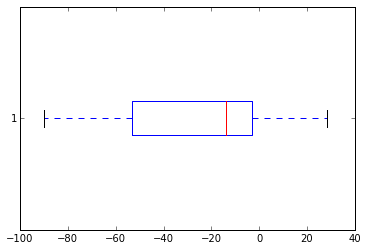

In [65]:
boxdata=[]
for lists in uniqdef.values():
    for v in lists:
        if v != 0.0:
            boxdata.append(v)

plt.boxplot(boxdata, 0, '', 0, 0.75)

In [79]:
with open('scattersize.csv', 'w') as f:  # Just use 'w' mode in 3.x
    w = csv.writer(f, delimiter=',', quoting=csv.QUOTE_ALL)
    for k in uniqsize.keys():
        w.writerow(k)
    for v in uniqsize.values():
        w.writerow(v)